In [28]:
import pandas as pd
facts  = ""
#with open("collaborative_model_process_analysis_2.pl","r") as file:
#with open("collaborative_model_process_analysis_3.pl","r") as file:
with open("collaborative_model_process_analysis_merge.pl","r") as file:
    for l in file:
        #if l.strip().startswith("%"):
        #    continue
        facts += l.strip() + "\n"


In [29]:
#!clingo recipe_model_tapp23_parallel_violation.pl
from clingo.symbol import Number
from clingo.control import Control

ctl = Control()
ctl.configuration.solve.models = 0
ctl.add("base", [], facts)
ctl.ground([("base", [])])
solver = ctl.solve(yield_=True)

In [30]:

df_models = []

for x in solver:
    df_output = {}
    df_output_str = {}

    for s in x.context.symbolic_atoms.signatures: 
        #print(s)
        df_output[(s[0],s[1])] = []
        df_output_str[(s[0],s[1])] = []

    for literal in x.symbols(atoms=True):
            #print(literal)
            key = literal.name
            val = len(literal.arguments)
            temp_tuple = [literal.name]
            temp_tuple = temp_tuple + [str(z) for z in literal.arguments]
            df_output[(key,val)].append(literal.arguments)
            df_output_str[(key,val)].append(temp_tuple)

    df_models.append((df_output,df_output_str))
    
#for y in x.context.symbolic_atoms.by_signature(s[0],s[1]):
#    temp_tuple = [y.symbol.name]
#    temp_tuple = temp_tuple + [str(z) for z in y.symbol.arguments]
#    df_output[(s[0],s[1])].append(y.symbol)
#    df_output_str[(s[0],s[1])].append(temp_tuple)

In [31]:
len(df_models)

2

In [32]:
df_output = df_models[0][0]
df_output_str = df_models[0][1]

In [33]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("serialize_recipe_path",8)])
test_pd.sort_values([7,5])

,0,1,2,3,4,5,6,7,8
1,serialize_recipe_path,r1,"recipe(0,null)","recipe(1,p1)",0,0,1,"seq(0,1,0)",0
0,serialize_recipe_path,r1,"recipe(0,null)","recipe(2,p2)",0,0,2,"seq(0,2,0)",0
5,serialize_recipe_path,r1,"recipe(0,null)","recipe(4,p4)",3,0,4,"seq(seq(0,3),seq(3,4,0),1)",1
2,serialize_recipe_path,r1,"recipe(0,null)","recipe(4,p4)","seq(0,3)",1,"seq(3,4,0)","seq(seq(0,3),seq(3,4,0),1)",0
4,serialize_recipe_path,r1,"recipe(0,null)","recipe(5,p5)",3,0,5,"seq(seq(0,3),seq(3,5,0),1)",1
3,serialize_recipe_path,r1,"recipe(0,null)","recipe(5,p5)","seq(0,3)",1,"seq(3,5,0)","seq(seq(0,3),seq(3,5,0),1)",0
8,serialize_recipe_path,h1,"recipe(0,null)","recipe(4,p4)",5,0,4,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",2
7,serialize_recipe_path,h1,"recipe(0,null)","recipe(4,p4)","seq(3,5)",1,"seq(5,4,0)","seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",1
6,serialize_recipe_path,h1,"recipe(0,null)","recipe(4,p4)","seq(0,3)",2,"seq(seq(3,5),seq(5,4,0),1)","seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",0


In [34]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("recipe",4)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
#test_pd.sort_values([7,5])
test_pd[test_pd[1]=="h1"]

,0,1,2,3,4
5,recipe,h1,3,p3,0
6,recipe,h1,5,p5,3
7,recipe,h1,4,p4,5


In [35]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("test_serialize_recipe",11)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd.sort_values([9,10])

,0,1,2,3,4,5,6,7,8,9,10,11
4,test_serialize_recipe,r1,"recipe(0,null)","recipe(1,p1)",0,1,0,1,p1,0,"seq(0,1,0)",0
5,test_serialize_recipe,r1,"recipe(0,null)","recipe(1,p1)",0,2,0,1,p1,0,"seq(0,1,0)",0
6,test_serialize_recipe,r1,"recipe(0,null)","recipe(1,p1)",0,4,0,1,p1,0,"seq(0,1,0)",0
7,test_serialize_recipe,r1,"recipe(0,null)","recipe(1,p1)",0,5,0,1,p1,0,"seq(0,1,0)",0
0,test_serialize_recipe,r1,"recipe(0,null)","recipe(2,p2)",0,1,0,2,p2,0,"seq(0,2,0)",0
1,test_serialize_recipe,r1,"recipe(0,null)","recipe(2,p2)",0,2,0,2,p2,0,"seq(0,2,0)",0
2,test_serialize_recipe,r1,"recipe(0,null)","recipe(2,p2)",0,4,0,2,p2,0,"seq(0,2,0)",0
3,test_serialize_recipe,r1,"recipe(0,null)","recipe(2,p2)",0,5,0,2,p2,0,"seq(0,2,0)",0
20,test_serialize_recipe,r1,"recipe(0,null)","recipe(4,p4)",0,1,0,3,p3,0,"seq(seq(0,3),seq(3,4,0),1)",1
21,test_serialize_recipe,r1,"recipe(0,null)","recipe(4,p4)",0,2,0,3,p3,0,"seq(seq(0,3),seq(3,4,0),1)",1


In [36]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("recipe_start",2)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd #.sort_values([6,5])

,0,1,2
0,recipe_start,r1,0
1,recipe_start,h1,0


In [37]:
df_output_str.keys()

dict_keys([('all_recipe_input', 2), ('all_recipe_output', 2), ('recipe', 4), ('not_recipe_start', 2), ('recipe_start', 2), ('not_recipe_sink', 2), ('recipe_sink', 2), ('recipe_edge', 6), ('recipe_path', 6), ('recipe_path_select', 6), ('recipe_edge_select', 6), ('select_recipe_path', 6), ('serialize_recipe_path', 8), ('select_serialize_recipe', 8), ('select_serialize_recipe', 9), ('test_serialize_recipe', 10), ('test_serialize_recipe', 11), ('removed_schema', 4), ('derived_output', 9), ('derived_process', 12), ('intersection_process', 5), ('read_violation', 13), ('write_violation', 14), ('missing_dependency', 6), ('signature_paths', 2), ('no_conflict', 3), ('cluster_conflict_not', 2), ('cluster_no_conflict', 3), ('merge_sign', 3), ('after', 4), ('node', 3), ('not_next', 4), ('after_next', 4), ('process_input', 3), ('process_output', 3), ('source', 3), ('array', 2), ('column', 2), ('row', 2), ('cell', 3), ('state', 3), ('user', 2), ('operation', 4), ('value', 5), ('column_schema', 3), ('

In [38]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("derived_output",9)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd = test_pd[test_pd[1]=="r1"]
#test_pd.sort_values([6,5])
test_pd

,0,1,2,3,4,5,6,7,8,9
0,derived_output,r1,0,1,-1,-1,"seq(0,2,0)",1,cs1,"state(-1,cs1)"
1,derived_output,r1,0,1,-1,-1,"seq(0,2,0)",1,cs2,"state(-1,cs2)"
2,derived_output,r1,0,1,-1,-1,"seq(0,2,0)",1,cs3,"state(-1,cs3)"
3,derived_output,r1,0,2,-1,-1,"seq(0,2,0)",1,cs1,"state(-1,cs1)"
4,derived_output,r1,0,2,-1,-1,"seq(0,2,0)",1,cs2,"state(-1,cs2)"
...,...,...,...,...,...,...,...,...,...,...
79,derived_output,r1,0,5,4,1,"seq(seq(0,3),seq(3,4,0),1)",0,cs1,"state(3,cs1)"
80,derived_output,r1,0,1,5,1,"seq(seq(0,3),seq(3,5,0),1)",0,cs1,"state(3,cs1)"
81,derived_output,r1,0,2,5,1,"seq(seq(0,3),seq(3,5,0),1)",0,cs1,"state(3,cs1)"
82,derived_output,r1,0,4,5,1,"seq(seq(0,3),seq(3,5,0),1)",0,cs1,"state(3,cs1)"


In [39]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("derived_process",12)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd = test_pd[test_pd[1]=="h1"]
test_pd.sort_values([4,6])

,0,1,2,3,4,5,6,7,8,9,10,11,12
80,derived_process,h1,0,4,3,0,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",2,cs1,"state(-1,cs1)",p3,cs1,"state(3,cs1)"
81,derived_process,h1,0,4,4,2,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",0,cs3,"state(5,cs3)",p4,cs3,"state(4,cs3)"
90,derived_process,h1,0,4,5,1,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",1,cs3,"state(-1,cs3)",p5,cs3,"state(5,cs3)"


In [40]:
test_pd.groupby([4,6]).count()

,,0,1,2,3,5,7,8,9,10,11,12
4,6,,,,,,,,,,,
3,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",1,1,1,1,1,1,1,1,1,1,1
4,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",1,1,1,1,1,1,1,1,1,1,1
5,"seq(seq(0,3),seq(seq(3,5),seq(5,4,0),1),2)",1,1,1,1,1,1,1,1,1,1,1


In [41]:
def transform_gv(derived_dependency_pd,selected_recipe=None):
    if selected_recipe is not None:
        derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]==selected_recipe]

    # visualize using graphviz yw layout

    nodes_def = """
    digraph "[stackcollapse]" {
    node [style=filled fillcolor="#f8f8f8"]
    """

    edge_def = ""

    # workflow template gv format

    header = """
    /* Start of top-level graph */
    digraph Workflow {
    rankdir=TB

    /* Start of double cluster for drawing box around nodes in workflow */
    subgraph cluster_workflow_box_outer { label=""; penwidth=0
    subgraph cluster_workflow_box_inner { label=""; penwidth=0
    """

    single_process = """
    /* Style for nodes representing atomic programs in workflow */
    node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

    /* Nodes representing atomic programs in workflow */
    """
    #state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


    side_b_process = """
    node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
    """
    #state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

    side_b_data = """
    node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
    """

    side_a_data = """
    node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
    """


    freq_pattern_nodes = """
    node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
    """
    #state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

    column_nodes = """
    /* Style for nodes representing non-parameter data channels in workflow */
    node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

    /* Nodes for non-parameter data channels in workflow */
    """
    #"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

    parameters_nodes = """
    /* Style for nodes representing parameter channels in workflow */
    node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

    /* Nodes representing parameter channels in workflow */
    """

    edges = """
    /* Edges representing connections between programs and channels */
    """
    #"col12_0-date" -> state_4


    footer = """
    /* End of double cluster for drawing box around nodes in workflow */
    }}

    /* End of top-level graph */
    }
    """

    edges_defined = set()
    column_set = {x[1]:x[3] for x in filter(lambda x:x[2]=="name",df_output_str[("column_schema",3)])}
    column_set["csRemoved"] = "removed"
    column_set["csNone"] = ""
    process_set = {x[1]:x[2] for x in df_output_str[("process",2)]}

    for p in derived_dependency_pd.to_records():
        #print(p)
        # workflow step/process nodes
        single_process+='''
        "{sid}.{pid}" [shape=record rankdir=LR label="{{<f0> {process_name} ({pid}) }}"];
        '''.format(sid=p[5],pid=p[11],process_name=process_set[p[11]].replace('"','\\"'))


        '''
        parameters_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=cs[1]+"_"+cs[2],label=cs[3].replace('"','\\"'))
        edges+="""
            {output} -> {input} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip="", style=dashed, arrowhead=none]    
        """.format(input=cs[1],output=cs[1]+"_"+cs[2],data=cs[2])  
        '''
            
        #if p[5].split(",")[-1]==p[11].split(",")[-1]:    
        input_edge = '"{input}" -> "{sid}.{pid}"'.format(input=p[10],sid=p[5],pid=p[11])  
        output_edge = '"{sid}.{pid}" -> "{output}"'.format(output=p[13],sid=p[5],pid=p[11])        


        if input_edge not in edges_defined:
            # schema nodes
            column_nodes+="""
            "{input}" [shape=record rankdir=LR label="{{<f0> {label} ({pid},{csid}) }}"]
            """.format(input=p[10],
                    label=column_set[p[9]].replace('"','\\"'),
                    pid=p[10].split(",")[0].split("(")[-1],
                    csid=p[9]
                    )   

            edges_defined.add(input_edge)

            edges+="""
                "{input}" -> "{sid}.{pid}" [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
            """.format(input=p[10],sid=p[5],pid=p[11])         

        if p[12] != "csRemoved":
            # no output edge needed

            if output_edge not in edges_defined:
                # schema nodes
                column_nodes+="""
                "{output}" [shape=record rankdir=LR label="{{<f0> {label} ({pid},{csid}) }}"]
                """.format(output=p[13],
                        label=column_set[p[12]].replace('"','\\"'),
                        pid=p[13].split(",")[0].split("(")[-1],
                        csid=p[12]
                        )

                edges_defined.add(output_edge)

                edges+="""
                    "{sid}.{pid}" -> "{output}"  [label="" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
                """.format(output=p[13],sid=p[5],pid=p[11])        
                            

    gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer

    return gv_string

In [42]:
from IPython.display import Image
#%input gv_string
def generate_pdf(gv_string,filename="temp",type="png"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+f".{type}"    
    !dot -T{type} -o $output $input
    if type=="png":   
        return Image(filename=output) 
    else:
        return f"pdf {output} has been created"

In [43]:
derived_dependency_pd = pd.DataFrame(df_output_str[("derived_process",12)])
derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]=="r1"]

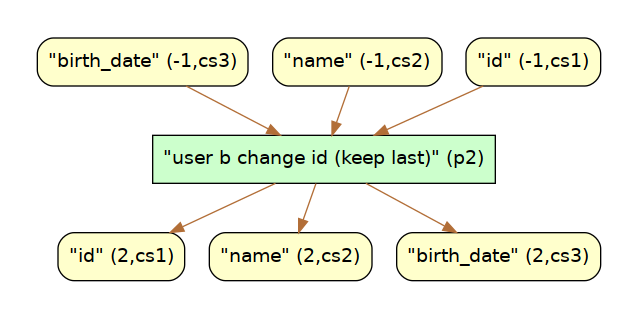

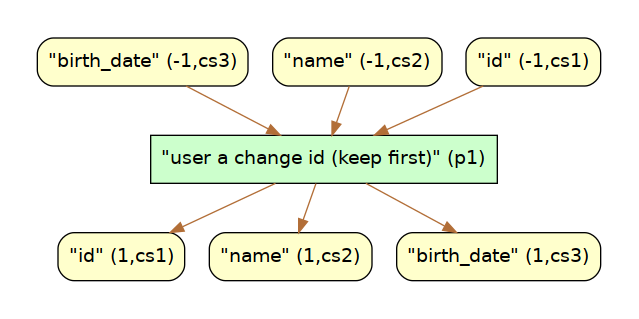

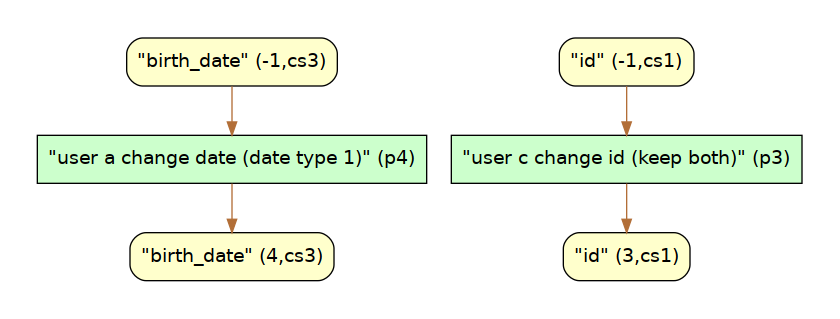

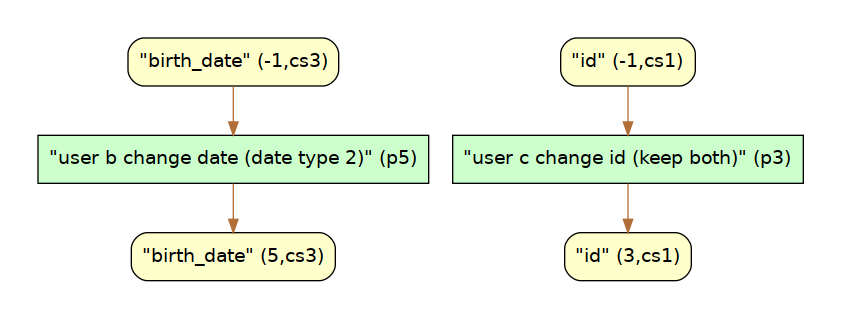

In [44]:
from matplotlib import pyplot as plt
from IPython.display import display, Image


individual_pd = derived_dependency_pd.groupby(6)

for i,x in enumerate(derived_dependency_pd[6].unique()):
    dd_pd = individual_pd.get_group(x)
    generate_pdf(transform_gv(dd_pd),f"process_model_abstraction_{i}",type="pdf")
    image = generate_pdf(transform_gv(dd_pd),f"process_model_abstraction_{i}")
    display(image)



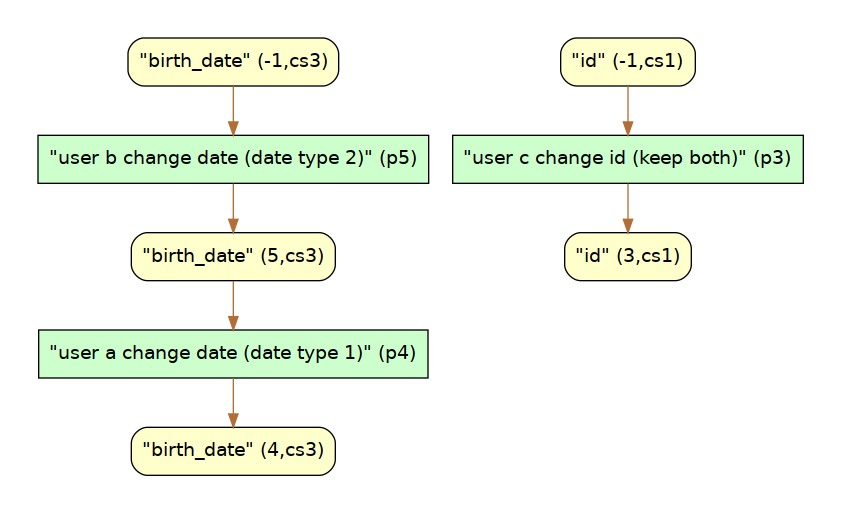

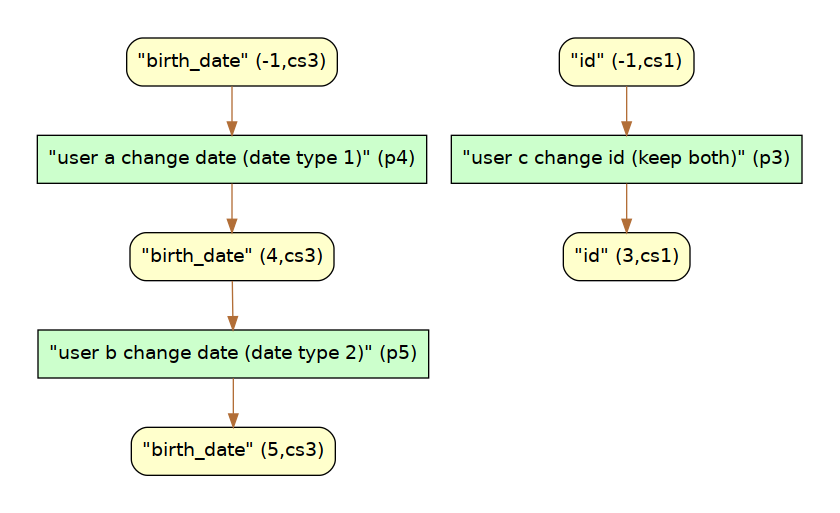

In [27]:
for x in df_models:
    df_output = x[0]
    df_output_str = x[1]
    derived_dependency_pd = pd.DataFrame(df_output_str[("derived_process",12)])
    derived_dependency_pd = derived_dependency_pd[derived_dependency_pd[1]=="h1"]
    #print(derived_dependency_pd)
    image = generate_pdf(transform_gv(derived_dependency_pd),"process_model_abstraction")
    display(image)


In [49]:
#generate_pdf(transform_gv(df_output_str,"r1"),"process_model_abstraction")

In [50]:
#generate_pdf(gv_string,"process_model_abstraction",type="pdf")

In [51]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("read_violation",13)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd #.sort_values([4,6])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,read_violation,r1,0,1,0,1,1,2,"seq(0,1,0)","seq(0,2,0)",cs1,"state(-1,cs1)",p1,p2
1,read_violation,r1,0,2,0,1,1,2,"seq(0,1,0)","seq(0,2,0)",cs1,"state(-1,cs1)",p1,p2
2,read_violation,r1,0,4,0,1,1,2,"seq(0,1,0)","seq(0,2,0)",cs1,"state(-1,cs1)",p1,p2
3,read_violation,r1,0,5,0,1,1,2,"seq(0,1,0)","seq(0,2,0)",cs1,"state(-1,cs1)",p1,p2
4,read_violation,r1,0,1,0,1,3,2,"seq(seq(0,3),seq(3,4,0),1)","seq(0,2,0)",cs1,"state(-1,cs1)",p3,p2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,read_violation,r1,0,5,0,5,1,5,"seq(0,1,0)","seq(seq(0,3),seq(3,5,0),1)",cs3,"state(-1,cs3)",p1,p5
380,read_violation,r1,0,1,0,5,4,5,"seq(seq(0,3),seq(3,4,0),1)","seq(seq(0,3),seq(3,5,0),1)",cs3,"state(-1,cs3)",p4,p5
381,read_violation,r1,0,2,0,5,4,5,"seq(seq(0,3),seq(3,4,0),1)","seq(seq(0,3),seq(3,5,0),1)",cs3,"state(-1,cs3)",p4,p5
382,read_violation,r1,0,4,0,5,4,5,"seq(seq(0,3),seq(3,4,0),1)","seq(seq(0,3),seq(3,5,0),1)",cs3,"state(-1,cs3)",p4,p5


In [52]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("no_conflict",3)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd.sort_values([2])

,0,1,2,3
3,no_conflict,r1,"seq(0,1,0)","seq(0,1,0)"
2,no_conflict,r1,"seq(0,2,0)","seq(0,2,0)"
1,no_conflict,r1,"seq(seq(0,3),seq(3,4,0),1)","seq(seq(0,3),seq(3,4,0),1)"
0,no_conflict,r1,"seq(seq(0,3),seq(3,5,0),1)","seq(seq(0,3),seq(3,5,0),1)"
4,no_conflict,h1,"seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)","seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)"


In [53]:
import pandas as pd
test_pd = pd.DataFrame(df_output_str[("cluster_no_conflict",3)])
#test_pd[test_pd[6]!="0"].sort_values([8,7])
test_pd #.sort_values([2])

,0,1,2,3
0,cluster_no_conflict,r1,"seq(seq(0,3),seq(3,5,0),1)","seq(seq(0,3),seq(3,5,0),1)"
1,cluster_no_conflict,r1,"seq(seq(0,3),seq(3,4,0),1)","seq(seq(0,3),seq(3,4,0),1)"
2,cluster_no_conflict,r1,"seq(0,2,0)","seq(0,2,0)"
3,cluster_no_conflict,r1,"seq(0,1,0)","seq(0,1,0)"
4,cluster_no_conflict,h1,"seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)","seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)"


In [54]:
#p[10]

In [55]:
derived_dependency_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12
80,derived_process,h1,0,5,3,0,"seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)",2,cs1,"state(-1,cs1)",p3,cs1,"state(3,cs1)"
81,derived_process,h1,0,5,5,2,"seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)",0,cs3,"state(4,cs3)",p5,cs3,"state(5,cs3)"
86,derived_process,h1,0,5,4,1,"seq(seq(0,3),seq(seq(3,4),seq(4,5,0),1),2)",1,cs3,"state(-1,cs3)",p4,cs3,"state(4,cs3)"


In [56]:
column_set

NameError: name 'column_set' is not defined

In [ ]:
pd.DataFrame(df_output_str[("column_schema",3)])[2]=="name"

0     True
1    False
2     True
3    False
4     True
5    False
Name: 2, dtype: bool

In [ ]:
df_output_str[("column_schema",3)]

[['column_schema', 'cs1', 'name', '"id"'],
 ['column_schema', 'cs1', 'data_type', 'text'],
 ['column_schema', 'cs2', 'name', '"name"'],
 ['column_schema', 'cs2', 'data_type', 'text'],
 ['column_schema', 'cs3', 'name', '"birth_date"'],
 ['column_schema', 'cs3', 'data_type', 'text']]